In [ ]:
!pip install dlib


In [ ]:
! pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=dc8f0e2da64e74654d7cc800b1083fc64e53c355f19a367412dd15261eca3bd1
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition as fr
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

In [ ]:
!mkdir known
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3-Ya_QKHBARLfUPPE93FwH36NSLQBm4xAuw&usqp=CAU -O known/1.jpg
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT41vcjqcNRFvac15jbkMB5jXVFP01U3-x78w&usqp=CAU -O known/2.jpg

/bin/bash: -O: command not found
--2022-02-23 14:20:15--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3-Ya_QKHBARLfUPPE93FwH36NSLQBm4xAuw
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.217.214.100, 172.217.214.102, 172.217.214.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|172.217.214.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9790 (9.6K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcR3-Ya_QKHBARLfUPPE93FwH36NSLQBm4xAuw’

images?q=tbn:ANd9Gc 100%[===================>]   9.56K  --.-KB/s    in 0s      

2022-02-23 14:20:15 (51.8 MB/s) - ‘images?q=tbn:ANd9GcR3-Ya_QKHBARLfUPPE93FwH36NSLQBm4xAuw’ saved [9790/9790]

/bin/bash: -O: command not found
--2022-02-23 14:20:15--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT41vcjqcNRFvac15jbkMB5jXVFP01U3-x78w
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.217.214.138, 172.217.214.101, 172.217.214.100, ...
Connect

In [ ]:
 !mkdir train
!mkdir test

In [ ]:
def img_read(path):
  img=cv2.imread(path)
  (h,w)=img.shape[:2]
  width=500
  ratio=width/float(w)
  height=int(h*ratio)
  return cv2.resize(img,(width,height))
path_train="/content/train"
known_names=[]
known_names_encoding=[]
for file in os.listdir(path_train):
  img=img_read(path_train+'/'+file)
  img_enc=fr.face_encodings(img)[0]
  known_names_encoding.append(img_enc)
  known_names.append(file.split('.')[0])
known_names

['henegy 2', 'mosalah 2', 'ashraph 2', 'adel emam 2']

In [ ]:
  known_names_encoding


[array([-0.14296573, -0.0082802 ,  0.1011235 , -0.02892666,  0.00079356,
        -0.11354978,  0.02737903, -0.08956723,  0.08752654, -0.09522296,
         0.18128715, -0.06377353, -0.27433163, -0.09336296,  0.0722456 ,
         0.13431159, -0.05603865, -0.13339145, -0.09464727, -0.08017556,
         0.01814164,  0.07056294,  0.00819581,  0.0689576 , -0.10890231,
        -0.30039263, -0.10140578, -0.11598197, -0.06489411,  0.03095465,
         0.03567009,  0.08136309, -0.1686998 , -0.06203473,  0.06538346,
         0.13321841, -0.00807985, -0.04288125,  0.20160995,  0.00068102,
        -0.11829313, -0.10168541,  0.14589128,  0.2324761 ,  0.05408757,
         0.02916239,  0.06986161,  0.01362181,  0.10935976, -0.23771395,
         0.01084262,  0.10762237,  0.12072507,  0.11930316,  0.14610535,
        -0.14755885,  0.1712794 ,  0.11979587, -0.28191483,  0.13891184,
         0.06101592, -0.07561313, -0.03415018,  0.072631  ,  0.22585696,
         0.09435693, -0.07984344, -0.16039878,  0.1

procissing ashraph 1
[False, False, True, False]


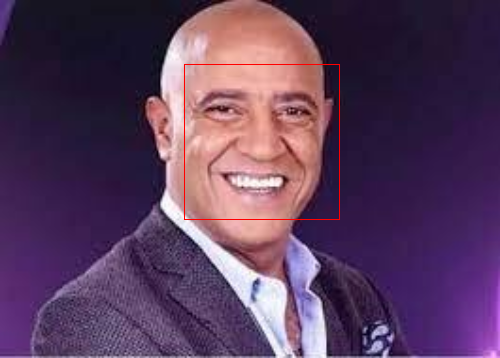

[0.77663037 0.7372711  0.         0.69243973]
procissing adel emam 1
[False, False, False, True]


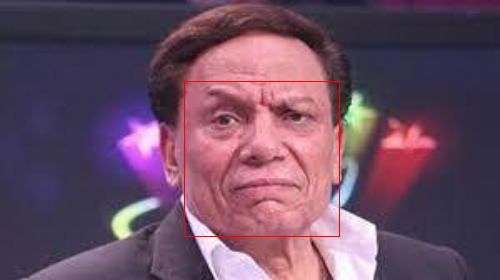

[0.73281781 0.67175099 0.6829724  0.51124777]
procissing mo salam1
[False, True, False, False]


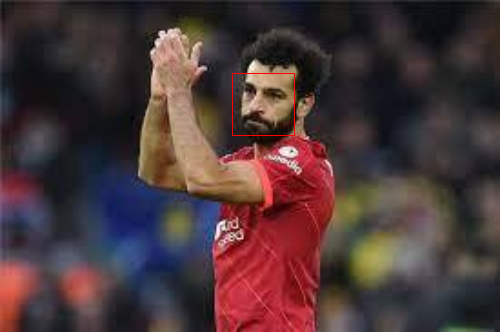

[0.77619031 0.54371629 0.75145653 0.78521073]
procissing henedy 1
[True, False, False, False]


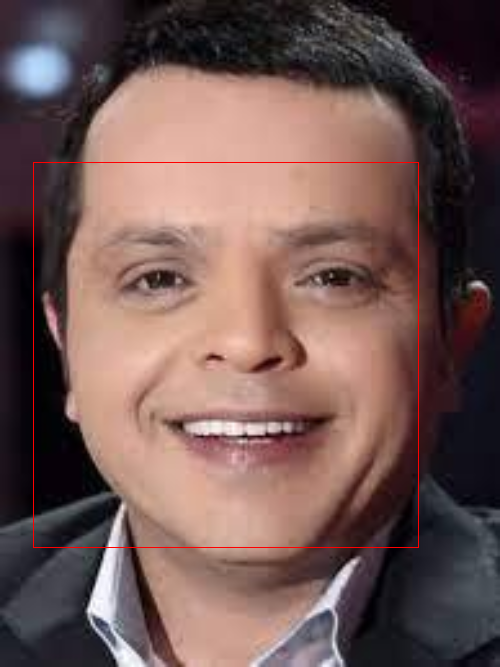

[0.4545967  0.74655444 0.77686193 0.74588257]


In [ ]:
path_test="/content/test"
for file in os.listdir(path_test):
  print('procissing',file.split('.')[0])
  img=img_read(path_test+'/'+file)
  img_enc=fr.face_encodings(img)[0]
  results=fr.compare_faces(known_names_encoding,img_enc)
  for i in range(len(results)):
    if results[i]:
      print(results)
      (top,right,bottom,left)=fr.face_locations(img)[0]
      cv2.rectangle(img,(left,top),(right,bottom),(0,0,255),1)
      cv2_imshow(img)
  print(fr.face_distance(known_names_encoding,img_enc))


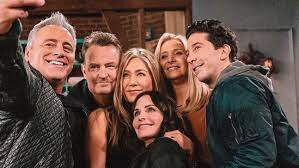

In [ ]:
images=os.listdir(path_train)
import PIL
PIL.Image.open(str(path_train+'/'+images[0]))